## PART A
---

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False) 
import scipy

a = np.array([[1,0,0,0,0],[0,1,0,0,0],[1,5,25,125,625],[0,1,10,75,500],[1,2,4,8,16]])
b = np.array([3,0,9,0,1])
x = np.linalg.solve(a, b)

print(x)

[ 3.00000000e+00 -4.26325641e-15 -2.13555556e+00  1.04622222e+00
 -1.14222222e-01]


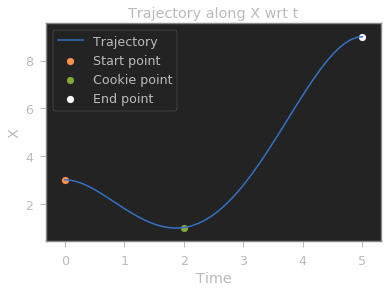

In [2]:
t = np.linspace(0, 5, num=50)
xt = x[0] + x[1]*(t) + x[2]*(t**2) + x[3]*(t**3) + x[4]*(t**4)
xa,ya = (3,0)#start point
xc,yc = (1,2.5)# cookie point
xb,yb = (9,5)# end point
t0 = 0
t2= 2
t5 = 5
plt.plot(t,xt,label='Trajectory')
plt.scatter(t0,xa,c='y',label = 'Start point')
plt.scatter(t2,xc,c='g',label = 'Cookie point')
plt.scatter(t5,xb,c='w',label = 'End point')
plt.xlabel('Time')
plt.ylabel('X')
plt.title("Trajectory along X wrt t")
plt.legend()

In [3]:

a = np.array([[1,0,0,0,0],[0,1,0,0,0],[1,5,25,125,625],[0,1,10,75,500],[1,2,4,8,16]])
b = np.array([0,0,5,0,2.5])
y = np.linalg.solve(a, b)

print(y)

[ 0.          0.          1.11388889 -0.28555556  0.02055556]


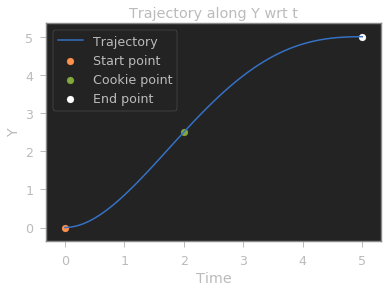

In [4]:
t = np.linspace(0, 5, num=50)
yt = y[0] + y[1]*(t) + y[2]*(t**2) + y[3]*(t**3) + y[4]*(t**4)
plt.plot(t,yt,label='Trajectory')
plt.scatter(t0,ya,c='y',label = 'Start point')
plt.scatter(t2,yc,c='g',label = 'Cookie point')
plt.scatter(t5,yb,c='w',label = 'End point')
plt.xlabel('Time')
plt.ylabel('Y')
plt.title("Trajectory along Y wrt t")
plt.legend()

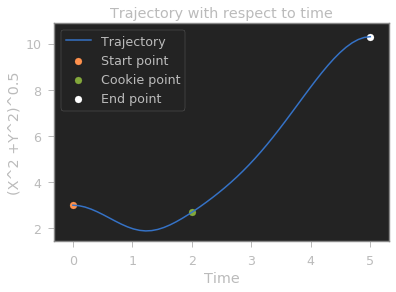

In [5]:
final = np.sqrt(xt**2 + yt**2)
p1 = np.sqrt(xa**2 + ya**2)
p2 = np.sqrt(xc**2 + yc**2)
p3 = np.sqrt(xb**2 + yb**2)
plt.plot(t,final,label='Trajectory')
plt.scatter(t0,p1,c='y',label = 'Start point')
plt.scatter(t2,p2,c='g',label = 'Cookie point')
plt.scatter(t5,p3,c='w',label = 'End point')
plt.xlabel('Time')
plt.ylabel('(X^2 +Y^2)^0.5')
plt.title("Trajectory with respect to time")
plt.legend()

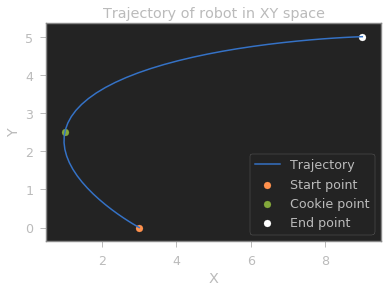

In [6]:
plt.plot(xt,yt,label='Trajectory')
plt.scatter(xa,ya,c='y',label = 'Start point')
plt.scatter(xc,yc,c='g',label = 'Cookie point')
plt.scatter(xb,yb,c='w',label = 'End point')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Trajectory of robot in XY space")
plt.legend()

Text(0.5, 1.0, 'Velocity profile along X')

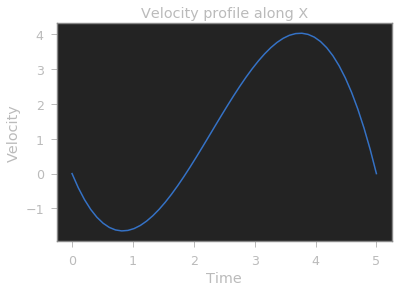

In [7]:
# velocity profiles

velx = x[1] + 2*x[2]*(t) + 3*x[3]*(t**2) + 4*x[4]*(t**3)
vely = y[1] + 2*y[2]*(t) + 3*y[3]*(t**2) + 4*y[4]*(t**3)

plt.plot(t,velx)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title("Velocity profile along X")

Text(0.5, 1.0, 'Velocity profile along Y')

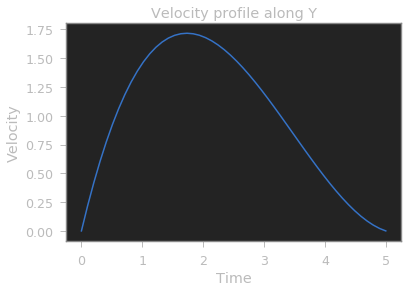

In [8]:
plt.plot(t,vely)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title("Velocity profile along Y")

Text(0.5, 1.0, 'Velocity Profile')

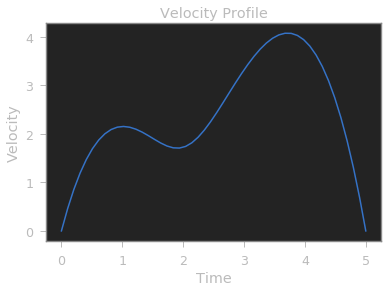

In [9]:
vel = np.sqrt(velx**2 +vely**2)
plt.plot(t,vel)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity Profile')


Text(0.5, 1.0, 'Acceleration profile along X')

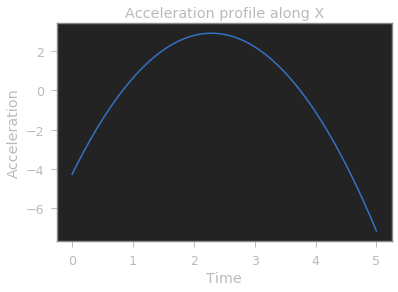

In [10]:
# acceleration profiles

accx = 2*x[2] + 6*x[3]*(t) + 12*x[4]*(t**2)
accy = 2*y[2] + 6*y[3]*(t) + 12*y[4]*(t**2)

plt.plot(t,accx)
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title("Acceleration profile along X")

Text(0.5, 1.0, 'Acceleration profile along Y')

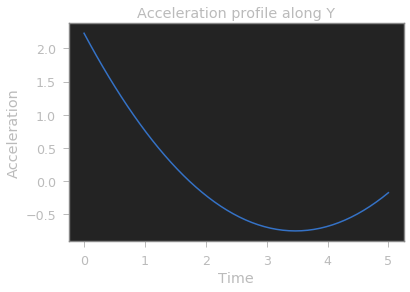

In [11]:
plt.plot(t,accy)
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title("Acceleration profile along Y")

Text(0.5, 1.0, 'Acceleration Profile')

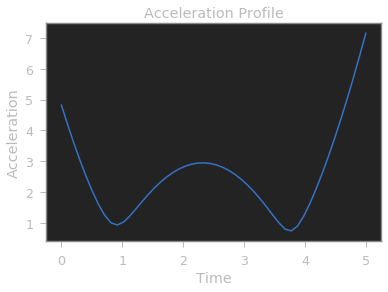

In [12]:
acc = np.sqrt(accx**2 +accy**2)
plt.plot(t,acc)
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Acceleration Profile')


## PART B
---

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False) 

In [14]:
def bernstein_poly(t, to = 0, tf = 5):
    B0= (1 - (t - to)/(-to + tf))**5
    B1=(5*(t - to)*(1 - (t - to)/(-to + tf))**4)/(-to + tf)
    B2= (10*(t - to)**2*(1 - (t - to)/(-to + tf))**3)/(-to + tf)**2
    B3= (10*(t - to)**3*(1 - (t - to)/(-to + tf))**2)/(-to + tf)**3
    B4=(5*(t - to)**4*(1 - (t - to)/(-to + tf)))/(-to + tf)**4
    B5= (t - to)**5/(-to + tf)**5
    return np.array([B0,B1,B2,B3,B4,B5])

In [15]:
def bernstein_der(t, to = 0, tf = 5):
    Bodot=-((5*(1 - (t - t0)/(-t0 + tf))**4)/(-t0 + tf))
    B1dot=-((20*(t - t0)*(1 - (t - t0)/(-t0 + tf))**3)/(-t0 + tf)**2) + (5*(1 - (t - t0)/(-t0 + tf))**4)/(-t0 + tf)
    B2dot=-((30*(t - t0)**2*(1 - (t - t0)/(-t0 + tf))**2)/(-t0 + tf)**3) + (20*(t - t0)*(1 - (t - t0)/(-t0 + tf))**3)/(-t0 + tf)**2
    B3dot=-((20*(t - t0)**3*(1 - (t - t0)/(-t0 + tf)))/(-t0 + tf)**4) + (30*(t - t0)**2*(1 - (t - t0)/(-t0 + tf))**2)/(-t0 + tf)**3
    B4dot=-((5*(t - t0)**4)/(-t0 + tf)**5) + (20*(t - t0)**3*(1 - (t - t0)/(-t0 + tf)))/(-t0 + tf)**4
    B5dot=(5*(t - t0)**4)/(-t0 + tf)**5
    return np.array([Bodot,B1dot,B2dot,B3dot,B4dot,B5dot])

In [16]:
def bernstein_d_der(t, to = 0, tf = 5):
    Boddot=(20*(1 - (t - t0)/(-t0 + tf))**3)/(-t0 + tf)**2
    B1ddot=(60*(t - t0)*(1 - (t - t0)/(-t0 + tf))**2)/(-t0 + tf)**3 - (40*(1 - (t - t0)/(-t0 + tf))**3)/(-t0 + tf)**2
    B2ddot=(60*(t - t0)**2*(1 - (t - t0)/(-t0 + tf)))/(-t0 + tf)**4 - (120*(t - t0)*(1 - (t - t0)/(-t0 + tf))**2)/(-t0 + tf)**3 + (20*(1 - (t - t0)/(-t0 + tf))**3)/(-t0 + tf)**2
    B3ddot=(20*(t - t0)**3)/(-t0 + tf)**5 - (120*(t - t0)**2*(1 - (t - t0)/(-t0 + tf)))/(-t0 + tf)**4 + (60*(t - t0)*(1 - (t - t0)/(-t0 + tf))**2)/(-t0 + tf)**3
    B4ddot=-((40*(t - t0)**3)/(-t0 + tf)**5) + (60*(t - t0)**2*(1 - (t - t0)/(-t0 + tf)))/(-t0 + tf)**4
    B5ddot=(20*(t - t0)**3)/(-t0 + tf)**5
    return np.array([Boddot,B1ddot,B2ddot,B3ddot,B4ddot,B5ddot])

In [17]:
l1 = bernstein_poly(0)
l2 = bernstein_der(0)
l3 = bernstein_poly(2)
l4 = bernstein_der(2)
l5 = bernstein_poly(5)
l6 = bernstein_der(5)

a = np.array([l1,l2,l3,l4,l5,l6])
print(a.shape)
b = np.array([3,0,1,0,9,0])

print(a)
Wx = np.linalg.solve(a, b)
print(Wx)

(6, 6)
[[ 1.       0.       0.       0.       0.       0.     ]
 [-1.       1.       0.       0.       0.       0.     ]
 [ 0.07776  0.2592   0.3456   0.2304   0.0768   0.01024]
 [-0.1296  -0.216    0.       0.192    0.128    0.0256 ]
 [ 0.       0.       0.       0.       0.       1.     ]
 [-0.       0.       0.       0.      -1.       1.     ]]
[ 3.          3.         -1.09814815 -1.8         9.          9.        ]


In [18]:
l1 = bernstein_poly(0)
l2 = bernstein_der(0)
l3 = bernstein_poly(2)
l4 = bernstein_der(2)
l5 = bernstein_poly(5)
l6 = bernstein_der(5)

a = np.array([l1,l2,l3,l4,l5,l6])
print(a.shape)
b = np.array([0,0,2.5,0,5,0])

print(a)
Wy = np.linalg.solve(a, b)
print(Wy.shape)

(6, 6)
[[ 1.       0.       0.       0.       0.       0.     ]
 [-1.       1.       0.       0.       0.       0.     ]
 [ 0.07776  0.2592   0.3456   0.2304   0.0768   0.01024]
 [-0.1296  -0.216    0.       0.192    0.128    0.0256 ]
 [ 0.       0.       0.       0.       0.       1.     ]
 [-0.       0.       0.       0.      -1.       1.     ]]
(6,)


In [19]:
t = np.linspace(0, 5, num=50)
a = bernstein_poly(t).T
print(a.shape)
X = np.dot(a,Wx)
print(X.shape)
Y = np.dot(a,Wy)
print(Y.shape)

(50, 6)
(50,)
(50,)


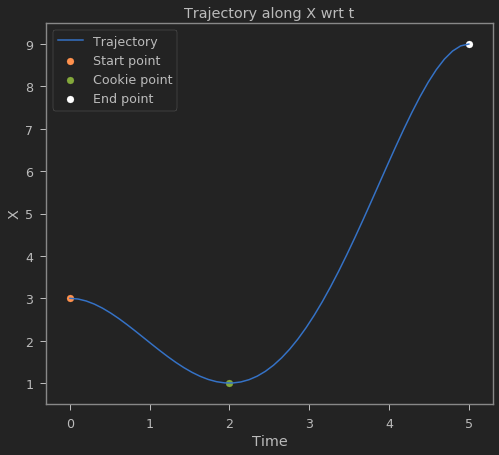

In [20]:
t2 = 2
plt.plot(t,X,label='Trajectory')
plt.scatter(t0,xa,c='y',label = 'Start point')
plt.scatter(t2,xc,c='g',label = 'Cookie point')
plt.scatter(t5,xb,c='w',label = 'End point')
plt.xlabel('Time')
plt.ylabel('X')
plt.title("Trajectory along X wrt t")
plt.legend()

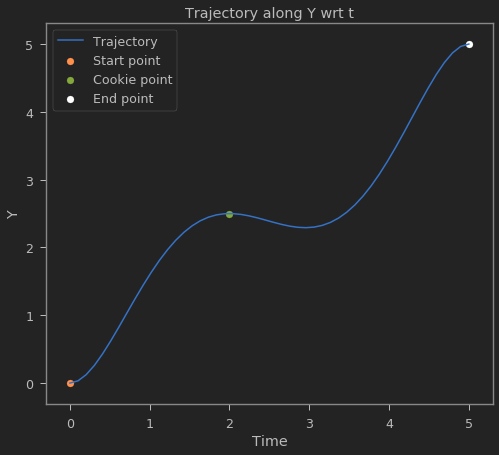

In [21]:
t2 = 2
plt.plot(t,Y,label='Trajectory')
plt.scatter(t0,ya,c='y',label = 'Start point')
plt.scatter(t2,yc,c='g',label = 'Cookie point')
plt.scatter(t5,yb,c='w',label = 'End point')
plt.xlabel('Time')
plt.ylabel('Y')
plt.title("Trajectory along Y wrt t")
plt.legend()

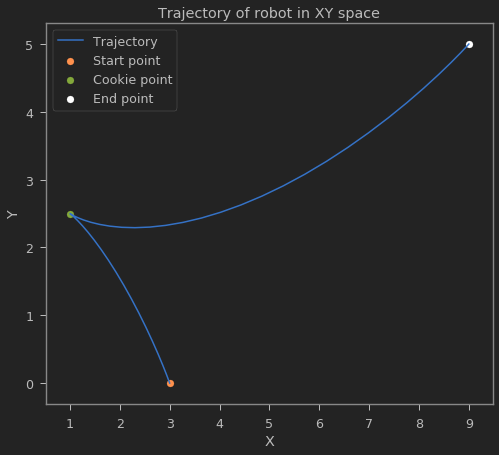

In [22]:
plt.plot(X,Y,label='Trajectory')
plt.scatter(xa,ya,c='y',label = 'Start point')
plt.scatter(xc,yc,c='g',label = 'Cookie point')
plt.scatter(xb,yb,c='w',label = 'End point')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Trajectory of robot in XY space")
plt.legend()

In [23]:
t = np.linspace(0, 5, num=50)
a = bernstein_der(t).T
print(a.shape)
Xd = np.dot(a,Wx)
print(X.shape)
Yd = np.dot(a,Wy)
print(Y.shape)

(50, 6)
(50,)
(50,)


Text(0.5, 1.0, 'Velocity along X wrt t')

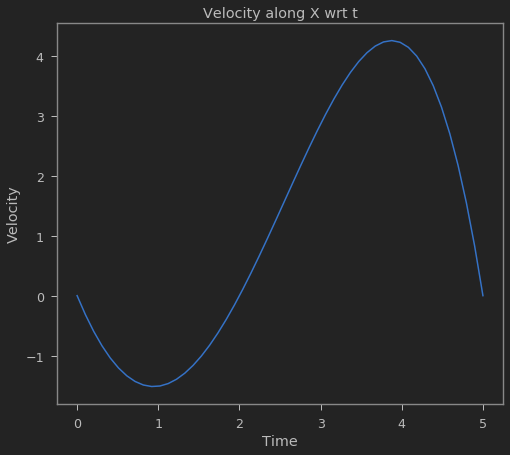

In [24]:
plt.plot(t,Xd)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title("Velocity along X wrt t")

Text(0.5, 1.0, 'Velocity along Y wrt t')

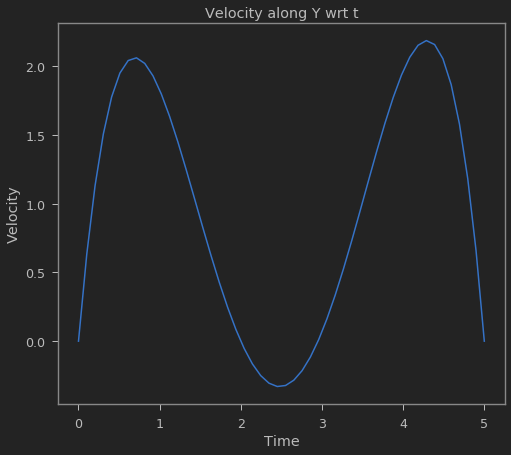

In [25]:
plt.plot(t,Yd)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title("Velocity along Y wrt t")

Text(0.5, 1.0, 'Velocity Profile')

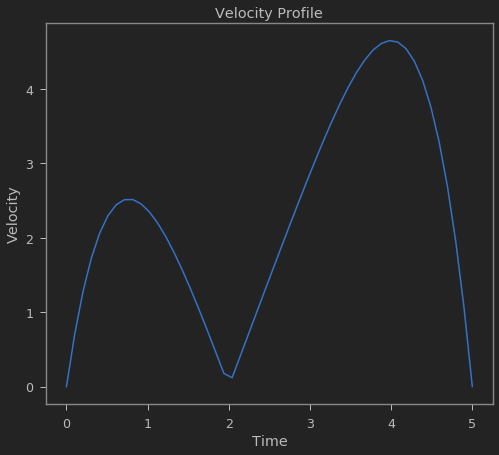

In [26]:
vel = np.sqrt(Xd**2 +Yd**2)
plt.plot(t,vel)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity Profile')

In [27]:
t = np.linspace(0, 5, num=50)
a = bernstein_d_der(t).T
print(a.shape)
Xdd = np.dot(a,Wx)
print(X.shape)
Ydd = np.dot(a,Wy)
print(Y.shape)

(50, 6)
(50,)
(50,)


Text(0.5, 1.0, 'Acceleration along X wrt t')

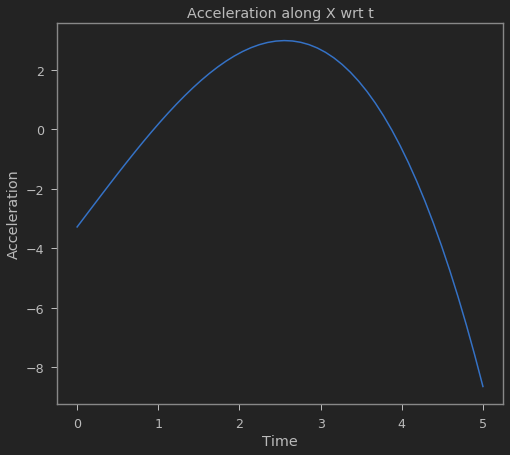

In [28]:
plt.plot(t,Xdd)
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title("Acceleration along X wrt t")

Text(0.5, 1.0, 'Acceleration along Y wrt t')

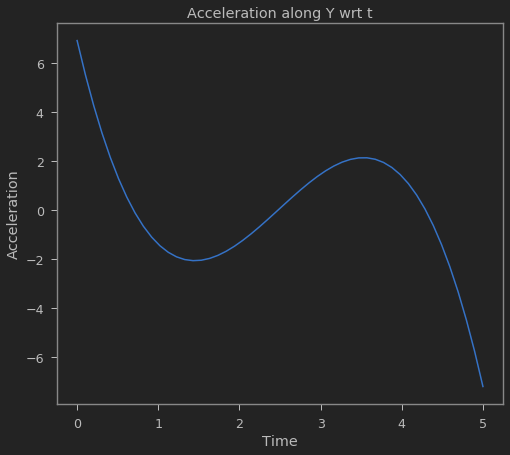

In [29]:
plt.plot(t,Ydd)
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title("Acceleration along Y wrt t")

Text(0.5, 1.0, 'Acceleration Profile')

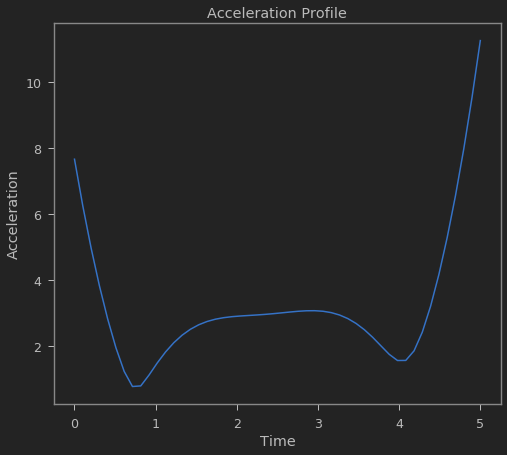

In [30]:
acc = np.sqrt(Xdd**2 +Ydd**2)
plt.plot(t,acc)
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Acceleration Profile')